In [7]:
import os
import csv
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [8]:
base = '0.75'
folder = f'results_{base}'

In [9]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

In [10]:
folders = [folder for folder in os.listdir(folder) if '.' not in folder]

files = [file for file in os.listdir(f'{folder}') if file.endswith('.csv')]
files = sorted(files, key=ordenar_por_numero)


for i, file in enumerate(files):
    N = int(file.split('=')[1].split('.')[0])

    alpha  = []
    energy = []

    with open(f'{folder}/{file}', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            alpha.append(float(row[0]))
            energy.append(float(row[1]))


    for n in range(len(energy)-1):
        if energy[n] * energy[n+1] < 0:
            alpha_c = (alpha[n] + alpha[n+1]) / 2
            print(f'${N}$ & ${round(alpha_c, 3)}$ \\\\')

$2$ & $1.111$ \\
$3$ & $1.141$ \\
$4$ & $1.161$ \\
$5$ & $1.161$ \\
$6$ & $1.171$ \\
$7$ & $1.171$ \\
$8$ & $1.171$ \\


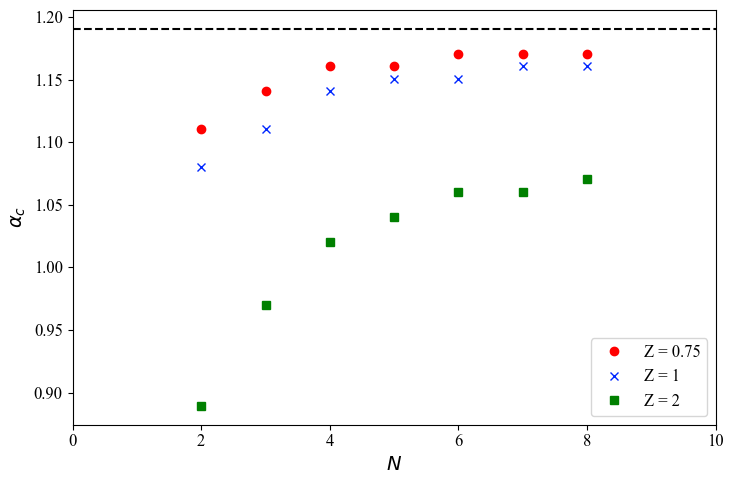

In [11]:
bases = [0.75, 1, 2]
markers = ['o', 'x', 's']
colors = ['red', '#0027FF', 'green']

rows = 1
columns = 1

fig, axs = plt.subplots(rows, columns, figsize=(7.5, 5))


for base in bases:
    globals()[f'base_{base}'] = []
    globals()[f'alpha_{base}'] = []

for l, base in enumerate(bases):
    folder = f'results_{base}'
    folders = [folder for folder in os.listdir(folder) if '.' not in folder]

    files = [file for file in os.listdir(f'{folder}') if file.endswith('.csv')]
    files = sorted(files, key=ordenar_por_numero)


    for i, file in enumerate(files):
        N = int(file.split('=')[1].split('.')[0])

        alpha  = []
        energy = []

        with open(f'{folder}/{file}', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)

            for row in reader:
                alpha.append(float(row[0]))
                energy.append(float(row[1]))

        
        for n in range(len(energy)-1):
            if energy[n] * energy[n+1] < 0:
                alpha_c = (alpha[n] + alpha[n+1]) / 2


        globals()[f'base_{base}'].append(N)
        globals()[f'alpha_{base}'].append(alpha_c)


    axs.errorbar(globals()[f'base_{base}'], globals()[f'alpha_{base}'], color=colors[l], marker=markers[l], linestyle='', label=f'Z = {base}', markersize=6)
    # axs[column].set_title(f'$N = {N}$', fontsize=16)
    axs.set_xlabel('$N$', fontsize=14)
    axs.set_ylabel(r'$\alpha_c$', fontsize=14)
    axs.grid(False)
    axs.legend(loc='lower right')
    axs.set_xlim(0, 10)
    # axs.set_ylim(-0.5, 0.1)


N = np.linspace(0, 10, 200).astype(int)
alpha_c = np.linspace(1.19061074, 1.19061074, 200).astype(float)
axs.plot(N, alpha_c, color='black', marker='', linestyle='--')

plt.tight_layout()
plt.savefig(f'yukawa_classic_plot.png')
plt.savefig(f'../../../TFG/Figuras/yukawa_classic_plot.png')
plt.show()